**TUGAS PRAKTIKUM**

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,

Metode pra pengolahan

Pemilihan fitur

Arsitektur ANN

Fungsi Aktivasi

ANN diimplementasikan dengan menggunakan tensorflow.

**Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


**Load Dataset MNIST**

In [2]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


**Pra-Pengolahan Data**

Normalisasi

In [3]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


One-hot encoding label

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


**Arsitektur ANN**

Model sederhana:

Input: 784 neuron

Hidden layer 1: 128 neuron (ReLU)

Hidden layer 2: 64 neuron (ReLU)

Output: 10 neuron (Softmax)

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Training Model**

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8031 - loss: 0.6655 - val_accuracy: 0.9516 - val_loss: 0.1752
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9533 - loss: 0.1623 - val_accuracy: 0.9613 - val_loss: 0.1353
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9682 - loss: 0.1093 - val_accuracy: 0.9668 - val_loss: 0.1094
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9781 - loss: 0.0753 - val_accuracy: 0.9703 - val_loss: 0.0992
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9819 - loss: 0.0598 - val_accuracy: 0.9734 - val_loss: 0.0910
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0490 - val_accuracy: 0.9716 - val_loss: 0.0926
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9889 - loss: 0.0372 - val_accuracy: 0.9739 - val_loss: 0.0917
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9914 - loss: 0.0308 - val_accuracy: 0.

**Evaluasi Model**

In [31]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy Test  : {acc:.4f}")
print(f"Loss Test      : {loss:.4f}")


Accuracy Test  : 0.9767
Loss Test      : 0.0785


**Visualisasi Grafis Akurasi & Loss**

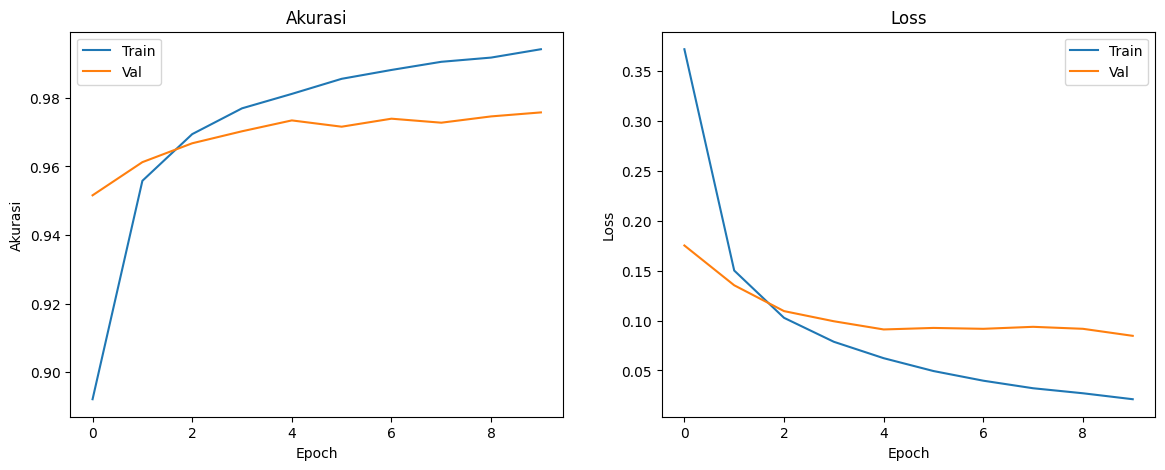

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()


**Prediksi**

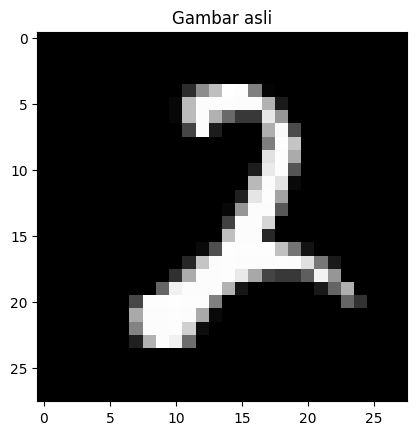

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediksi : 2


In [27]:
import random

idx = random.randint(0, 9999)
img = X_test[idx]

plt.imshow(img, cmap='gray')
plt.title("Gambar asli")
plt.show()

pred = model.predict(img.reshape(1,28,28))
print("Prediksi :", np.argmax(pred))


**Eksperimen A: Tambah Dropout**

In [32]:
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


**Eksperimen B: Ubah Aktivasi (tanh, elu)**

In [19]:
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


**Eksperimen C: Optimizer lain (RMSprop / SGD)**

In [22]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


**Compile dan Train Model Eksperimen**

In [33]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7763 - loss: 0.7194 - val_accuracy: 0.9498 - val_loss: 0.1651
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9428 - loss: 0.1905 - val_accuracy: 0.9667 - val_loss: 0.1098
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9593 - loss: 0.1300 - val_accuracy: 0.9709 - val_loss: 0.0923
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9702 - loss: 0.0983 - val_accuracy: 0.9739 - val_loss: 0.0863
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9722 - loss: 0.0887 - val_accuracy: 0.9754 - val_loss: 0.0811
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9779 - loss: 0.0717 - val_accuracy: 0.9774 - val_loss: 0.0776
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9783 - loss: 0.0653 - val_accuracy: 0.9767 - val_loss: 0.0721
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9813 - loss: 0.0580 - val_accurac

**Evaluasi Model Eksperimen**

In [34]:
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy Model 2 :", acc2)
print("Loss Model 2     :", loss2)


Accuracy Model 2 : 0.9796000123023987
Loss Model 2     : 0.07553374022245407


**Visualisasi Hasil (Grafik Akurasi & Loss)**

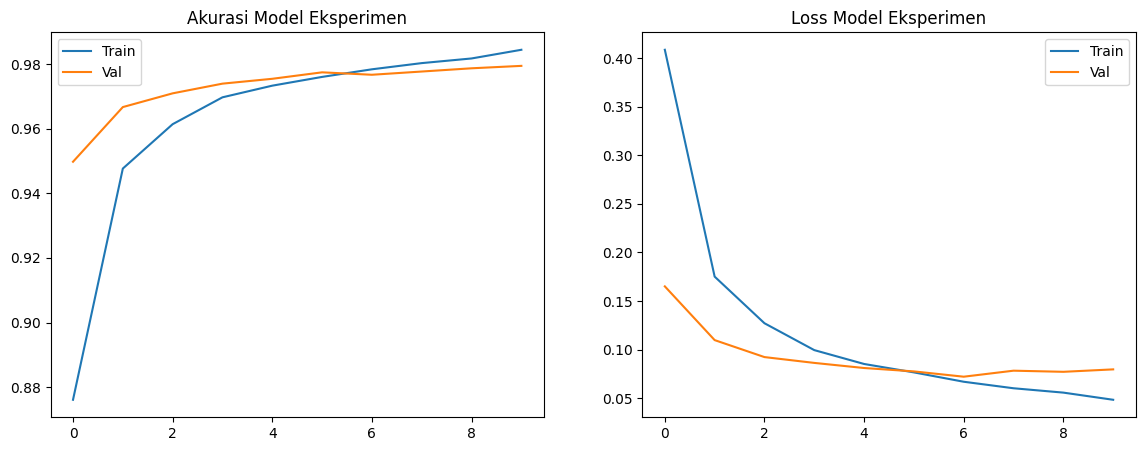

In [35]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Akurasi Model Eksperimen')
plt.legend(['Train', 'Val'])

plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss Model Eksperimen')
plt.legend(['Train', 'Val'])

plt.show()
